# Handling the multiplicity of inputs in a discrete Bayesian network

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

## Multiple inputs (observations) of a given type

Consider the Bayesian network shown below where there are two inputs ($c$ and $p$) and one inferred node ($w$).

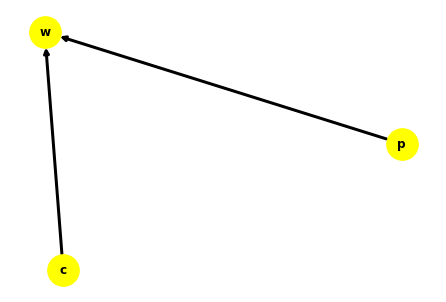

In [2]:
G = nx.DiGraph()
G.add_edge("c", "w")
G.add_edge("p", "w")
pos = nx.spring_layout(G)
nx.draw(G, node_color='yellow', node_size=1000, with_labels=True, font_weight='bold', width=3)
plt.show()

Suppose that the input $c$ could be observed some unknown number of times, but there is an upper limit. The network would be as shown below if the maximum number of $c$'s is 5.

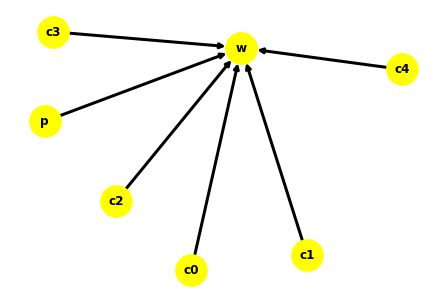

In [14]:
G = nx.DiGraph()
G.add_edge("c0", "w")
G.add_edge("c1", "w")
G.add_edge("c2", "w")
G.add_edge("c3", "w")
G.add_edge("c4", "w")
G.add_edge("p", "w")
pos = nx.spring_layout(G)
nx.draw(G, node_color='yellow', node_size=1000, with_labels=True, font_weight='bold', width=3)
plt.show()

The CPT for node $w$ would have the structure:

| c0 | c1 | c2 | c3 | c4 | p | w |
|----|----|----|----|----|----|----|

With 6 inputs ($c_0$ to $c_4$ and $p$), the full CPT has $2^6 = 64$ rows.

If the $c$'s are interchangeable, the $c$'s could be populated from lowest to highest. This enforcement causes the CPT to have fewer rows than would be required for a full table. An example of the structure of such a CPT is:

| c0 | c1 | c2 | c3 | c4 | p     | w |
|----|----|----|----|----|-------|---|
| 0  | 0  | 0  | 0  | 0  | False |   |
| 1  | 0  | 0  | 0  | 0  | False |   |
| 1  | 1  | 0  | 0  | 0  | False |   |
| 1  | 1  | 1  | 1  | 0  | False |   |
| 1  | 1  | 1  | 1  | 1  | False |   |
| 0  | 0  | 0  | 0  | 0  | True  |   |
| 1  | 0  | 0  | 0  | 0  | True  |   |
| 1  | 1  | 0  | 0  | 0  | True  |   |
| 1  | 1  | 1  | 1  | 0  | True  |   |
| 1  | 1  | 1  | 1  | 1  | True  |   |

The enforcement has reduced the number of rows from 64 to 10.

One way to reduce the size further is to put in an intermediate node called $h$ that acts as an aggregator. The structure of the Bayesian network with the aggregator is as shown below.

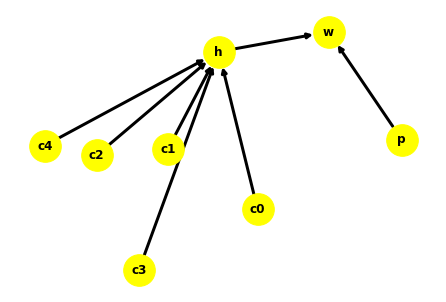

In [3]:
G = nx.DiGraph()
G.add_edge("c0", "h")
G.add_edge("c1", "h")
G.add_edge("c2", "h")
G.add_edge("c3", "h")
G.add_edge("c4", "h")
G.add_edge("h", "w")
G.add_edge("p", "w")
pos = nx.spring_layout(G)
nx.draw(G, node_color='yellow', node_size=1000, with_labels=True, font_weight='bold', width=3)
plt.show()

The CPT for $h$ would contain as many $c$'s as there could be in the worst case. If the $c$'s are interchangeable, the $c$'s could be populated from lowest to highest. This enforcement causes the CPT to have fewer rows than would be required for a full table. An example of the structure of such a CPT is:

| c0 | c1 | c2 | c3 | c4 | h |
|----|----|----|----|----|---|
| 0  | 0  | 0  | 0  | 0  | p0  |
| 1  | 0  | 0  | 0  | 0  | p1  |
| 1  | 1  | 0  | 0  | 0  | p2  |
| 1  | 1  | 1  | 0  | 0  | p3  |
| 1  | 1  | 1  | 1  | 0  | p4  |
| 1  | 1  | 1  | 1  | 1  | p5  |

The node $c$ is just observed or not. This means the network can be simplified to that shown below where $|c|$ refers to the number of $c$ nodes that have been observed as true.

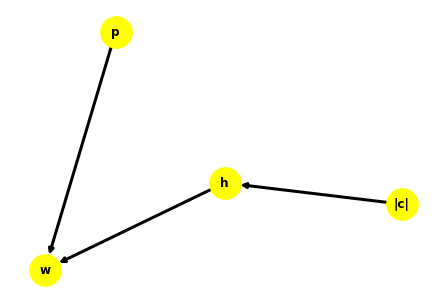

In [4]:
G = nx.DiGraph()
G.add_edge("|c|", "h")
G.add_edge("h", "w")
G.add_edge("p", "w")
pos = nx.spring_layout(G)
nx.draw(G, node_color='yellow', node_size=1000, with_labels=True, font_weight='bold', width=3)
plt.show()

Instead of introducing an aggregation node, the graph could be modified to be:

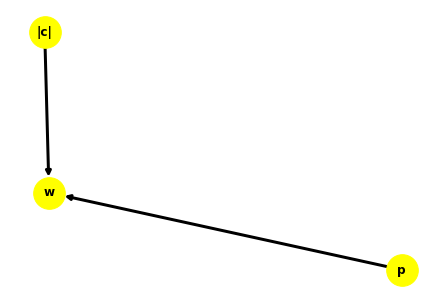

In [15]:
G = nx.DiGraph()
G.add_edge("|c|", "w")
G.add_edge("p", "w")
pos = nx.spring_layout(G)
nx.draw(G, node_color='yellow', node_size=1000, with_labels=True, font_weight='bold', width=3)
plt.show()

The CPT could look like this:

| \|c\| | p     | w |
|-------|-------|---|
| 0     | True  |   |
| 0     | False |   |
| 1     | True  |   |
| 1     | False |   |
| 2     | True  |   |
| 2     | False |   |
| 3     | True  |   |
| 3     | False |   |

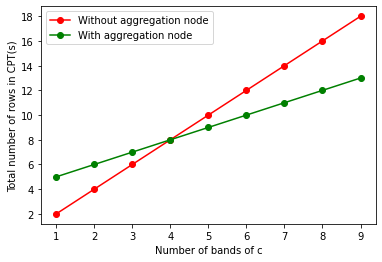

In [25]:
n_bands = range(1, 10)
without_agg = [2*n for n in n_bands]
with_agg = [4 + n for n in n_bands]

plt.plot(n_bands, without_agg, 'r-o', label='Without aggregation node')
plt.plot(n_bands, with_agg, 'g-o', label='With aggregation node')
plt.xlabel('Number of bands of c')
plt.ylabel('Total number of rows in CPT(s)')
plt.legend()
plt.show()

For a typical use case with 4 or fewer bands, avoiding the aggregation node produces the simplest network structure and the smallest number of questions to have to pose to experts.

Suppose both $c$ and $h$ are counts. The plot below shows the effect of introducing aggregation nodes for both those nodes.

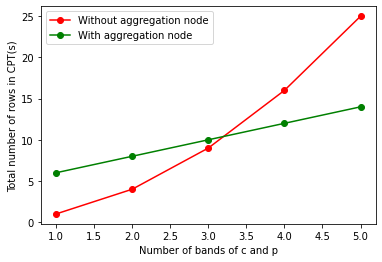

In [26]:
n_bands = range(1, 6)
without_agg = [n*n for n in n_bands]
with_agg = [4 + n + n for n in n_bands]

plt.plot(n_bands, without_agg, 'r-o', label='Without aggregation node')
plt.plot(n_bands, with_agg, 'g-o', label='With aggregation node')
plt.xlabel('Number of bands of c and p')
plt.ylabel('Total number of rows in CPT(s)')
plt.legend()
plt.show()

### Example with an aggregation node

In [5]:
# Probability label
# (on the Professional Head of Intelligence Assessment Probability Yardstick scale to its range)
phia = {
    "Remote chance": [0, 5],
    "Highly unlikely": [10, 20],
    "Unlikely": [25, 35],
    "Realistic possibility": [40, 50],
    "Likely / probable": [55, 75],
    "Highly likely": [80, 90],
    "Almost certain": [95, 100]
}

In [6]:
# CPT for node 'w'
cpt_w = {
    # Inputs of the form (h, p)
    (False, False): "Remote chance",
    (False, True): "Unlikely",
    (True, False): "Realistic possibility",
    (True, True): "Highly likely"
}

In [7]:
# CPT for node 'h'
cpt_h = {
    # (min, max) of '|c|'
    (0, 0): "Remote chance",
    (1, 1): "Highly unlikely",
    (2, 3): "Realistic possibility",
    (4, 100): "Almost certain"
}

In [8]:
def label_to_probability(label):
    """Convert a label on the PHIA yardstick to a probability."""
    
    assert type(label) == str
    assert label in phia.keys(), f"Unknown label '{label}'"
    
    p = (phia[label][0] + phia[label][1]) / 200
    
    # Postconditions
    assert 0.0 <= p <= 1.0
    return p

# Tests
assert label_to_probability("Remote chance") == 0.025
assert label_to_probability("Likely / probable") == 0.65

In [9]:
def calc_prob_w_given_h_p(w, h, p):
    """Calculate p(w=true|h, p)."""
    
    # Preconditions
    assert type(w) == bool
    assert type(h) == bool
    assert type(p) == bool
    
    label = cpt_w[(h,p)]
    prob = label_to_probability(label)
    
    if not w:
        prob = 1.0 - prob
    
    assert 0.0 <= prob <= 1.0
    return prob

# Tests
assert 0.0 <= calc_prob_w_given_h_p(True, True, False) <= 1.0

In [10]:
def calc_prob_h_given_c(h, c):
    """Calculate p(h|c)."""
    
    # Preconditions
    assert type(h) == bool
    assert type(c) == int
    assert c >= 0
    
    prob = None
    for rng, label in cpt_h.items():
        if rng[0] <= c <= rng[1]:
            prob = label_to_probability(label)
            break
            
    if prob is None:
        raise Exception(f"Failed to find c: {c}")
    
    if not h:
        prob = 1.0 - prob
            
    # Postconditions
    assert 0.0 <= prob <= 1.0, f"Invalid probability {prob}"
    return prob

# Tests
assert calc_prob_h_given_c(True, 0) + calc_prob_h_given_c(False, 0) == 1.0

In [11]:
def calc_prob_w_true(c, p):
    """Calculate p(w|c,p)."""
    
    # Preconditions
    assert type(c) == int
    assert c >= 0
    assert type(p) == bool
    
    # Calculate the numerator
    num = calc_prob_w_given_h_p(True, False, p) * calc_prob_h_given_c(False, c) + \
        calc_prob_w_given_h_p(True, True, p) * calc_prob_h_given_c(True, c)
    
    den = calc_prob_w_given_h_p(False, False, p) * calc_prob_h_given_c(False, c) + \
        calc_prob_w_given_h_p(False, True, p) * calc_prob_h_given_c(True, c) + \
        calc_prob_w_given_h_p(True, False, p) * calc_prob_h_given_c(False, c) + \
        calc_prob_w_given_h_p(True, True, p) * calc_prob_h_given_c(True, c)
    
    p = num / den
    
    # Postcondition
    assert 0.0 <= p <= 1.0
    
    return p

In [12]:
c_rng = range(0, 10)
prob_p_false = [calc_prob_w_true(c, False) for c in c_rng]
prob_p_true = [calc_prob_w_true(c, True) for c in c_rng]

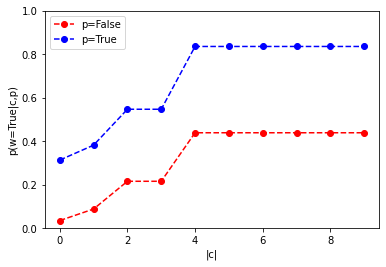

In [13]:
plt.plot(c_rng, prob_p_false, 'ro--', label='p=False')
plt.plot(c_rng, prob_p_true, 'bo--', label='p=True')
plt.xlabel("|c|")
plt.ylabel('p(w=True|c,p)')
plt.ylim(0, 1)
plt.legend()
plt.show()